<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B05%5D%20-%20Arboles%20de%20decision/05_We_Arboles_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de decisión

Este notebook es un **we do**: todo resuelto y explicado paso a paso.

Objetivo: Predecir si un cliente representa bajo o alto riesgo crediticio


ESTRUCTURA:
- Parte 1 (Proporcionada): Setup, EDA básico, modelo baseline
- Parte 2 (A completar): Optimización, evaluación avanzada, interpretación


In [1]:
# 1.1 IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                              accuracy_score, precision_score, recall_score,
                              f1_score)
from sklearn.preprocessing import LabelEncoder

✅ Dataset cargado correctamente
Dimensiones: (1000, 9)

Distribución de la variable objetivo:
riesgo
Alto Riesgo    542
Bajo Riesgo    458
Name: count, dtype: int64

ANÁLISIS EXPLORATORIO DE DATOS (EDA)

📊 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               1000 non-null   int64 
 1   ingreso_anual      1000 non-null   int64 
 2   deuda_actual       1000 non-null   int64 
 3   antiguedad_empleo  1000 non-null   int64 
 4   num_creditos       1000 non-null   int64 
 5   tipo_vivienda      1000 non-null   object
 6   estado_civil       1000 non-null   object
 7   historial_pagos    1000 non-null   object
 8   riesgo             1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

📈 Estadísticas Descriptivas:
             edad  ingreso_anual  deuda_actual  antiguedad_em

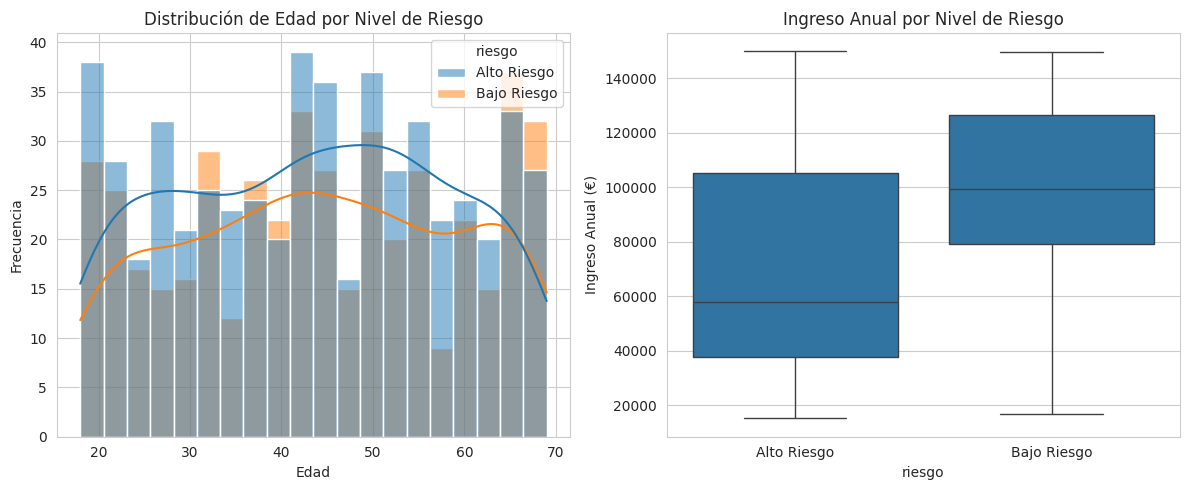


PREPARACIÓN DE DATOS
✅ Datos preparados:
   - Tamaño training: (800, 8)
   - Tamaño test: (200, 8)

MODELO BASELINE: Árbol de Decisión Sin Optimizar

📊 Métricas del Modelo Baseline:
   - Accuracy: 0.9800
   - Precision: 0.9727
   - Recall: 0.9907
   - F1-Score: 0.9817


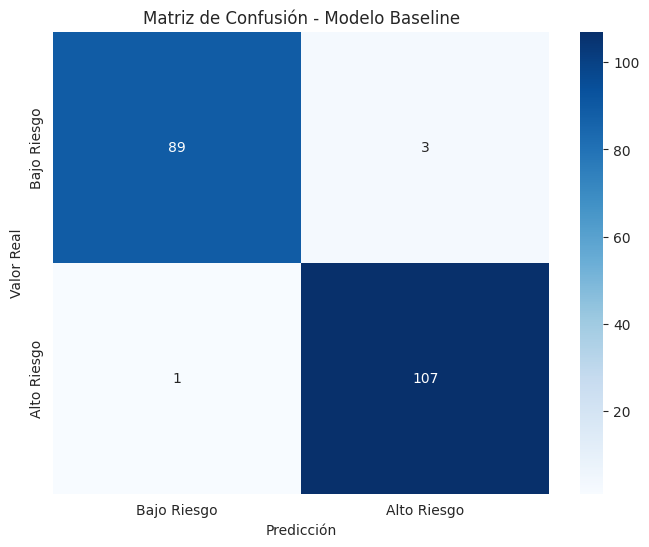


✅ Parte 1 completada. Ahora es tu turno...


In [2]:
# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1.2 CARGAR DATASET
# Usaremos un dataset sintético de riesgo crediticio
np.random.seed(42)

data = {
    'edad': np.random.randint(18, 70, 1000),
    'ingreso_anual': np.random.randint(15000, 150000, 1000),
    'deuda_actual': np.random.randint(0, 80000, 1000),
    'antiguedad_empleo': np.random.randint(0, 30, 1000),
    'num_creditos': np.random.randint(0, 5, 1000),
    'tipo_vivienda': np.random.choice(['Propia', 'Alquilada', 'Hipoteca'], 1000),
    'estado_civil': np.random.choice(['Soltero', 'Casado', 'Divorciado'], 1000),
    'historial_pagos': np.random.choice(['Excelente', 'Bueno', 'Regular', 'Malo'], 1000)
}

df = pd.DataFrame(data)

# Generar variable objetivo basada en reglas lógicas
def generar_riesgo(row):
    score = 0
    if row['ingreso_anual'] > 60000: score += 2
    if row['deuda_actual'] < 20000: score += 2
    if row['historial_pagos'] in ['Excelente', 'Bueno']: score += 2
    if row['antiguedad_empleo'] > 5: score += 1
    if row['edad'] > 30: score += 1

    return 'Bajo Riesgo' if score >= 5 else 'Alto Riesgo'

df['riesgo'] = df.apply(generar_riesgo, axis=1)

print("✅ Dataset cargado correctamente")
print(f"Dimensiones: {df.shape}")
print(f"\nDistribución de la variable objetivo:")
print(df['riesgo'].value_counts())

# 1.3 EDA BÁSICO (Proporcionado)
print("\n" + "="*80)
print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*80)

# Información general
print("\n📊 Información del Dataset:")
print(df.info())

print("\n📈 Estadísticas Descriptivas:")
print(df.describe())

# Visualización: Distribución de edad por riesgo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='edad', hue='riesgo', bins=20, kde=True)
plt.title('Distribución de Edad por Nivel de Riesgo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='riesgo', y='ingreso_anual')
plt.title('Ingreso Anual por Nivel de Riesgo')
plt.ylabel('Ingreso Anual (€)')

plt.tight_layout()
plt.show()

# 1.4 PREPARACIÓN DE DATOS (Proporcionado)
print("\n" + "="*80)
print("PREPARACIÓN DE DATOS")
print("="*80)

# Encoding de variables categóricas
label_encoders = {}
categorical_columns = ['tipo_vivienda', 'estado_civil', 'historial_pagos']

for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Preparar X e y
feature_columns = ['edad', 'ingreso_anual', 'deuda_actual', 'antiguedad_empleo',
                   'num_creditos', 'tipo_vivienda_encoded', 'estado_civil_encoded',
                   'historial_pagos_encoded']

X = df[feature_columns]
y = df['riesgo'].map({'Bajo Riesgo': 0, 'Alto Riesgo': 1})

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Datos preparados:")
print(f"   - Tamaño training: {X_train.shape}")
print(f"   - Tamaño test: {X_test.shape}")

# 1.5 MODELO BASELINE (Proporcionado)
print("\n" + "="*80)
print("MODELO BASELINE: Árbol de Decisión Sin Optimizar")
print("="*80)

# Entrenar árbol simple
baseline_tree = DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train, y_train)

# Predicciones
y_pred_baseline = baseline_tree.predict(X_test)

# Métricas básicas
print(f"\n📊 Métricas del Modelo Baseline:")
print(f"   - Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"   - Precision: {precision_score(y_test, y_pred_baseline):.4f}")
print(f"   - Recall: {recall_score(y_test, y_pred_baseline):.4f}")
print(f"   - F1-Score: {f1_score(y_test, y_pred_baseline):.4f}")

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo Riesgo', 'Alto Riesgo'],
            yticklabels=['Bajo Riesgo', 'Alto Riesgo'])
plt.title('Matriz de Confusión - Modelo Baseline')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

print("\n✅ Parte 1 completada. Ahora es tu turno...")

In [3]:
# =============================================================================
# PARTE 2: A COMPLETAR POR LOS ESTUDIANTES
# =============================================================================

print("\n" + "="*80)
print("🎯 EJERCICIO PARA ESTUDIANTES")
print("="*80)


🎯 EJERCICIO PARA ESTUDIANTES


In [4]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.1: Análisis de Importancia de Características
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.1: Importancia de Características")
print("-" * 80)
print("""
TAREA: Analiza qué características son más importantes para el modelo baseline.

INSTRUCCIONES:
1. Obtén las importancias de las características del árbol baseline usando .feature_importances_
2. Crea un DataFrame con las características y sus importancias
3. Ordénalas de mayor a menor
4. Visualiza las 5 características más importantes en un gráfico de barras

CÓDIGO A COMPLETAR:
""")


📝 EJERCICIO 2.1: Importancia de Características
--------------------------------------------------------------------------------

TAREA: Analiza qué características son más importantes para el modelo baseline.

INSTRUCCIONES:
1. Obtén las importancias de las características del árbol baseline usando .feature_importances_
2. Crea un DataFrame con las características y sus importancias
3. Ordénalas de mayor a menor
4. Visualiza las 5 características más importantes en un gráfico de barras

CÓDIGO A COMPLETAR:



In [5]:
# TODO: Obtener importancias
# importances = baseline_tree.????
# feature_importance_df = pd.DataFrame({
#     'caracteristica': ????,
#     'importancia': ????
# }).sort_values(????, ascending=False)

# TODO: Visualizar top 5
# plt.figure(figsize=(10, 6))
# sns.barplot(????)
# plt.title('Top 5 Características Más Importantes')
# plt.xlabel('Importancia')
# plt.show()

In [6]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.2: Optimización de Hiperparámetros
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.2: Optimización de Hiperparámetros")
print("-" * 80)
print("""
TAREA: Encuentra los mejores hiperparámetros para el árbol de decisión.

INSTRUCCIONES:
1. Utiliza GridSearchCV de sklearn.model_selection
2. Prueba diferentes valores para:
   - max_depth: [3, 5, 7, 10, None]
   - min_samples_split: [2, 5, 10, 20]
   - min_samples_leaf: [1, 2, 5, 10]
   - criterion: ['gini', 'entropy']
3. Usa cv=5 para validación cruzada
4. Imprime los mejores parámetros y el mejor score

CÓDIGO A COMPLETAR:
""")


📝 EJERCICIO 2.2: Optimización de Hiperparámetros
--------------------------------------------------------------------------------

TAREA: Encuentra los mejores hiperparámetros para el árbol de decisión.

INSTRUCCIONES:
1. Utiliza GridSearchCV de sklearn.model_selection
2. Prueba diferentes valores para:
   - max_depth: [3, 5, 7, 10, None]
   - min_samples_split: [2, 5, 10, 20]
   - min_samples_leaf: [1, 2, 5, 10]
   - criterion: ['gini', 'entropy']
3. Usa cv=5 para validación cruzada
4. Imprime los mejores parámetros y el mejor score

CÓDIGO A COMPLETAR:



In [7]:
# TODO: Importar GridSearchCV
# from sklearn.model_selection import GridSearchCV

# TODO: Definir grid de parámetros
# param_grid = {
#     'max_depth': ????,
#     'min_samples_split': ????,
#     'min_samples_leaf': ????,
#     'criterion': ????
# }

# TODO: Crear y entrenar GridSearchCV
# grid_search = GridSearchCV(
#     DecisionTreeClassifier(random_state=42),
#     param_grid,
#     cv=????,
#     scoring='f1',
#     n_jobs=-1
# )
# grid_search.fit(????, ????)

# TODO: Imprimir mejores parámetros
# print(f"Mejores parámetros: {grid_search.best_params_}")
# print(f"Mejor F1-Score (CV): {grid_search.best_score_:.4f}")

In [8]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.3: Entrenar Modelo Optimizado
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.3: Modelo Optimizado")
print("-" * 80)
print("""
TAREA: Entrena un nuevo modelo con los mejores hiperparámetros encontrados.

INSTRUCCIONES:
1. Crea un nuevo DecisionTreeClassifier con los mejores parámetros
2. Entrénalo con los datos de entrenamiento
3. Realiza predicciones en el conjunto de test
4. Calcula y compara las métricas con el modelo baseline

CÓDIGO A COMPLETAR:
""")



📝 EJERCICIO 2.3: Modelo Optimizado
--------------------------------------------------------------------------------

TAREA: Entrena un nuevo modelo con los mejores hiperparámetros encontrados.

INSTRUCCIONES:
1. Crea un nuevo DecisionTreeClassifier con los mejores parámetros
2. Entrénalo con los datos de entrenamiento
3. Realiza predicciones en el conjunto de test
4. Calcula y compara las métricas con el modelo baseline

CÓDIGO A COMPLETAR:



In [9]:
# TODO: Crear modelo optimizado
# optimized_tree = DecisionTreeClassifier(
#     max_depth=????,
#     min_samples_split=????,
#     min_samples_leaf=????,
#     criterion=????,
#     random_state=42
# )

# TODO: Entrenar
# optimized_tree.fit(????, ????)

# TODO: Predecir
# y_pred_optimized = optimized_tree.predict(????)

# TODO: Calcular métricas
# print(f"\n📊 Comparación de Modelos:")
# print(f"\nBASELINE:")
# print(f"   - Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
# print(f"   - F1-Score: {f1_score(y_test, y_pred_baseline):.4f}")

# print(f"\nOPTIMIZADO:")
# print(f"   - Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
# print(f"   - F1-Score: {f1_score(y_test, y_pred_optimized):.4f}")

In [10]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.4: Visualización del Árbol Optimizado
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.4: Visualización del Árbol")
print("-" * 80)
print("""
TAREA: Visualiza el árbol de decisión optimizado para interpretarlo.

INSTRUCCIONES:
1. Utiliza plot_tree de sklearn.tree
2. Configura:
   - filled=True (para colores)
   - feature_names con los nombres de las características
   - class_names=['Bajo Riesgo', 'Alto Riesgo']
   - fontsize apropiado (8-10)
3. Analiza: ¿Cuál es la primera división? ¿Tiene sentido desde perspectiva de negocio?

CÓDIGO A COMPLETAR:
""")


📝 EJERCICIO 2.4: Visualización del Árbol
--------------------------------------------------------------------------------

TAREA: Visualiza el árbol de decisión optimizado para interpretarlo.

INSTRUCCIONES:
1. Utiliza plot_tree de sklearn.tree
2. Configura:
   - filled=True (para colores)
   - feature_names con los nombres de las características
   - class_names=['Bajo Riesgo', 'Alto Riesgo']
   - fontsize apropiado (8-10)
3. Analiza: ¿Cuál es la primera división? ¿Tiene sentido desde perspectiva de negocio?

CÓDIGO A COMPLETAR:



In [11]:
# TODO: Visualizar árbol
# plt.figure(figsize=(20, 10))
# plot_tree(
#     optimized_tree,
#     filled=????,
#     feature_names=????,
#     class_names=????,
#     fontsize=????
# )
# plt.title('Árbol de Decisión Optimizado - Riesgo Crediticio')
# plt.show()

In [12]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.5: Matriz de Confusión y Métricas Detalladas
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.5: Análisis de Errores")
print("-" * 80)
print("""
TAREA: Analiza en detalle los errores del modelo optimizado.

INSTRUCCIONES:
1. Crea una matriz de confusión del modelo optimizado
2. Visualízala con seaborn.heatmap
3. Imprime el classification_report completo
4. REFLEXIONA:
   - ¿Qué tipo de error es más crítico en este contexto de negocio?
   - ¿Falsos positivos (predecir alto riesgo cuando es bajo) o
   - Falsos negativos (predecir bajo riesgo cuando es alto)?

CÓDIGO A COMPLETAR:
""")


📝 EJERCICIO 2.5: Análisis de Errores
--------------------------------------------------------------------------------

TAREA: Analiza en detalle los errores del modelo optimizado.

INSTRUCCIONES:
1. Crea una matriz de confusión del modelo optimizado
2. Visualízala con seaborn.heatmap
3. Imprime el classification_report completo
4. REFLEXIONA:
   - ¿Qué tipo de error es más crítico en este contexto de negocio?
   - ¿Falsos positivos (predecir alto riesgo cuando es bajo) o
   - Falsos negativos (predecir bajo riesgo cuando es alto)?

CÓDIGO A COMPLETAR:



In [13]:
# TODO: Matriz de confusión
# cm_optimized = confusion_matrix(????, ????)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
#             xticklabels=????,
#             yticklabels=????)
# plt.title('Matriz de Confusión - Modelo Optimizado')
# plt.ylabel('Valor Real')
# plt.xlabel('Predicción')
# plt.show()

# TODO: Classification report
# print("\n📋 Reporte de Clasificación Detallado:")
# print(classification_report(????, ????,
#                            target_names=['Bajo Riesgo', 'Alto Riesgo']))


In [14]:
# -----------------------------------------------------------------------------
# EJERCICIO 2.6: Validación Cruzada Manual
# -----------------------------------------------------------------------------
print("\n📝 EJERCICIO 2.6: Validación Cruzada (BONUS)")
print("-" * 80)
print("""
TAREA BONUS: Implementa validación cruzada para evaluar la estabilidad del modelo.

INSTRUCCIONES:
1. Usa cross_val_score con cv=5
2. Calcula scores de accuracy, precision, recall y f1
3. Imprime la media y desviación estándar de cada métrica
4. INTERPRETA: ¿Es estable el modelo? ¿Hay mucha varianza entre folds?

CÓDIGO A COMPLETAR:
""")


📝 EJERCICIO 2.6: Validación Cruzada (BONUS)
--------------------------------------------------------------------------------

TAREA BONUS: Implementa validación cruzada para evaluar la estabilidad del modelo.

INSTRUCCIONES:
1. Usa cross_val_score con cv=5
2. Calcula scores de accuracy, precision, recall y f1
3. Imprime la media y desviación estándar de cada métrica
4. INTERPRETA: ¿Es estable el modelo? ¿Hay mucha varianza entre folds?

CÓDIGO A COMPLETAR:



In [15]:
# TODO: Validación cruzada
# from sklearn.model_selection import cross_val_score

# metrics = ['accuracy', 'precision', 'recall', 'f1']
# for metric in metrics:
#     scores = cross_val_score(optimized_tree, X_train, y_train,
#                             cv=5, scoring=metric)
#     print(f"{metric.upper()}:")
#     print(f"  Media: {scores.mean():.4f}")
#     print(f"  Std: {scores.std():.4f}")
#     print(f"  Scores: {scores}\n")

In [16]:

# =============================================================================
# PREGUNTAS DE REFLEXIÓN PARA ENTREGAR
# =============================================================================
print("\n" + "="*80)
print("📝 PREGUNTAS DE REFLEXIÓN (Incluir en tu entrega)")
print("="*80)
print("""
1. ¿Qué características fueron más importantes según el modelo? ¿Tiene sentido
   desde una perspectiva de negocio bancario?

2. ¿Cómo mejoraron las métricas al optimizar los hiperparámetros? ¿Cuál fue
   el hiperparámetro que más impacto tuvo?

3. Analizando la matriz de confusión: En un contexto bancario real, ¿qué tipo
   de error es más costoso? ¿Dar crédito a alguien de alto riesgo (FN) o
   rechazar a alguien de bajo riesgo (FP)? Justifica tu respuesta.

4. Si tuvieras que presentar este modelo a un director de banco sin formación
   técnica, ¿cómo explicarías cómo funciona el árbol de decisión y por qué
   debería confiar en él?

5. ¿Qué limitaciones identificas en este modelo? ¿Cómo lo mejorarías?
   (Pista: piensa en ensemble methods como Random Forest)
""")

print("\n✅ ¡Ejercicio completado! No olvides subir tu notebook con todas las")
print("   celdas ejecutadas y las preguntas de reflexión respondidas.")


📝 PREGUNTAS DE REFLEXIÓN (Incluir en tu entrega)

1. ¿Qué características fueron más importantes según el modelo? ¿Tiene sentido
   desde una perspectiva de negocio bancario?

2. ¿Cómo mejoraron las métricas al optimizar los hiperparámetros? ¿Cuál fue
   el hiperparámetro que más impacto tuvo?

3. Analizando la matriz de confusión: En un contexto bancario real, ¿qué tipo
   de error es más costoso? ¿Dar crédito a alguien de alto riesgo (FN) o
   rechazar a alguien de bajo riesgo (FP)? Justifica tu respuesta.

4. Si tuvieras que presentar este modelo a un director de banco sin formación
   técnica, ¿cómo explicarías cómo funciona el árbol de decisión y por qué
   debería confiar en él?

5. ¿Qué limitaciones identificas en este modelo? ¿Cómo lo mejorarías?
   (Pista: piensa en ensemble methods como Random Forest)


✅ ¡Ejercicio completado! No olvides subir tu notebook con todas las
   celdas ejecutadas y las preguntas de reflexión respondidas.
